# Segundo Exercício Programa

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Descreva Precisamente a função $\beta$
**(solução)** A função $\beta$ e definida por partes, onde cada um dos seus componentes é um polinômio de grau 3 e atinge seu máximo em $t=0$ (aqui o máximo é normalizado para valer 1). O valor de $\beta$ fora do intervalo $[-2,2]$ é 0 e assim $\beta$ pode ser escrita  como:

$$ \beta(t) = 
    \begin{cases}
        0 & \text{se } t < -2 \\
        \beta_1(t) & \text{se } -2 \leq t < -1 \\
        \beta_2(t) & \text{se } -1 \leq t < 0 \\
        \beta_3(t) & \text{se } 0 \leq t < 1 \\
        \beta_4(t) & \text{se } 1 \leq t < 2 \\
        0 & \text{se } t > 2 
     \end{cases}
$$

Precisamos que $\beta$ seja "suave" em seu domínio, portanto precisamos que:

$$ \lim_{t \to a-} \beta(t) = \lim_{t \to a+} \beta(t)$$
$$ \lim_{t \to a-} \beta'(t) = \lim_{t \to a+} \beta'(t)$$
$$ \lim_{t \to a-} \beta''(t) = \lim_{t \to a+} \beta''(t)$$

onde $a \in \{-2, -1, 0, 1, 2\}$.

#### Coeficientes de $\beta_4$

Temos que $\beta_4(2) = \beta_4'(2) = \beta_4''(2) = 0$, e portanto $\beta_4$ deve ser da forma $\beta_4 = a(2-t)^3$

#### Coeficientes de $\beta_3$

temos que como $\beta_3$ possui seu máximo em $t=0$, temos que $\beta_3(0) = 1 $e $\beta_3'(0) = 0$. Assim se $\beta_3$ é da forma $\beta_3(t) = bt^3 + ct^2 + dt + e$ temos:

$$ 1 = \beta_3(0) = e \implies e = 1$$
$$ 0 = \beta_3'(0)= d \implies d= 0$$

e assim $\beta_4 = bt^3 +ct^2 +1$.

#### Encontrando a, b e c

Como $\beta$ deve ser "suave" em $t=1$ temos que:

$$\lim_{t \to 1-} \beta(t) = \lim_{t \to 1+} \beta(t) \implies b + c + 1 = a $$
$$ \lim_{t \to 1-} \beta'(t) = \lim_{t \to 1+} \beta'(t) \implies 3b + 2c = -3a $$
$$ \lim_{t \to 1-} \beta''(t) = \lim_{t \to 1+} \beta''(t) \implies 6b + 2c = 6a $$

resolvendo o sistema acima temos: $a=\frac{1}{4}$, $b=\frac{3}{4}$ e $b=-\frac{3}{2}$.
Assim $\beta_4(t) = \frac{1}{4}(2-t)^3$ e $\beta_3 = \frac{1}{4}t^3 - \frac{3}{2} t^2 + 1$

#### Encontrando $\beta_1$ e $\beta_2$

Como a função $\beta$ deve ser simétrica($\beta(-t) = \beta(t)$) temos que: $\beta_1(t) = \frac{1}{4}(t+2)^3$ e $\beta_2(t) = -\frac{3}{4} t^3 - \frac{3}{2} t^2 + 1 $.

#### Forma final:

$$ \beta(t) = 
    \begin{cases}
        0 & \text{se } t < -2 \\
        \frac{1}{4}(t+2)^3 & \text{se } -2 \leq t < -1 \\
        -\frac{3}{4} t^3 - \frac{3}{2} t^2 + 1 & \text{se } -1 \leq t < 0 \\
        \frac{1}{4}t^3 - \frac{3}{2} t^2 + 1 & \text{se } 0 \leq t < 1 \\
        \frac{1}{4}(2-t)^3 & \text{se } 1 \leq t < 2 \\
        0 & \text{se } t > 2 
     \end{cases}
$$

In [3]:
#implementa a função beta(t) como definida acima
def beta(t):
    if t < 0:
        return beta(-1*t)
    if t < 1:
        return (0.75*t-1.5)*t*t +1
    if t < 2:
        return 0.25 * (2-t)*(2-t)*(2-t)
    else:
        return 0

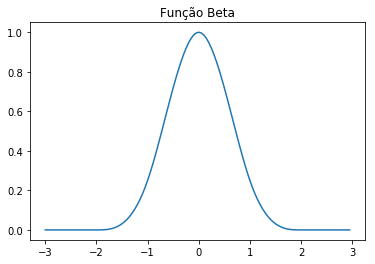

In [4]:
t = np.arange(-3,3,.05)
y = np.array(list(map(beta, t)))
plt.plot(t,y)
plt.title('Função Beta')
plt.show()

### (questão 2) Encontre a B-spline cúbica

$$ s_a(t) = a_0\beta(t) + a_1 \beta(t-1)$$

tal que $s_a(0) = 1 e s_a(1) = 2.

**(solução)** temos que:

$$ 1 = s_a(0) = a_0 \beta(0) + a_1 \beta(-1) = a_0 + \frac{1}{4}a_1$$
$$ 2 = s_a(1) = a_0 \beta(1) + a_1 \beta(0) = \frac{1}{4}a_0  + a_1$$

e portanto 

$$ \frac{1}{4}(1-\frac{1}{4}a_1) + a_1 = 2 \implies 1-\frac{1}{4}a_1 + 4a_1 = 8 \implies 16a_1 - a_1 = 28 \implies a_1 = \frac{28}{15}$$ 
e
$$ a_0 = 1 - \frac{1}{4} \frac{28}{15} = 1-\frac{7}{15} = \frac{8}{15}$$

portanto: $$s_a(t) = \frac{8}{15}\beta(t) + \frac{28}{15} \beta(t-1)$$

In [5]:
#função que dado a lista dos coeficientes cria a função s correspondente
def create_s(a):
    def s(t):
        value = 0
        for i,c in zip(range(len(a)),a):
            value += c*beta(t-i)
        return value
    return s

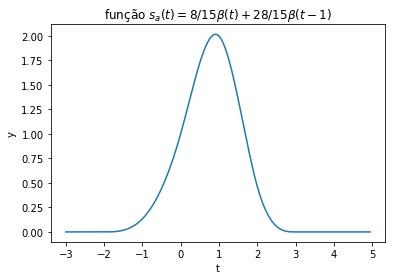

In [6]:
s = create_s([8/15,28/15])
t = np.arange(-3, 5, .05)
y = np.array(list(map(s, t)))
plt.plot(t,y)
plt.title(r'função $s_a(t) = 8/15 \beta(t) + 28/15 \beta(t-1)$')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### (questão 3) Encontre a B-spline cúbica

$$ s_a(t) = a_0\beta(t) + a_1 \beta(t-1) + a_2 \beta(t-2)$$

tal que $s_a(0) = 1, s_a(1) = 2 e s_a(2) = 1.

**(solução)** temos que:

$$ 1 = s_a(0) = a_0 \beta(0) + a_1 \beta(-1) + a_2 \beta(-2) = a_0 + \frac{1}{4}a_1 \implies a_0 = 1-\frac{1}{4}a_1$$
$$ 2 = s_a(1) = a_0 \beta(1) + a_1 \beta(0) + a_2 \beta(-1)= \frac{1}{4}a_0  + a_1 + \frac{1}{4}a_2$$
$$ 1 = s_a(0) = a_0 \beta(2) + a_1 \beta(1) + a_2 \beta(0) = a_2 + \frac{1}{4}a_1 \implies a_2 = 1-\frac{1}{4}a_1$$

e portanto: 

$$ \frac{1}{4}(1-\frac{1}{4}a_1) + a_1 + \frac{1}{4}(1-\frac{1}{4}a_1) =2 \implies 8a_1 - a_1 = 12 \implies a_1 = \frac{12}{7}$$ 
e
$$ a_0 = a_2 = 1 - \frac{1}{4} \frac{12}{7} = \frac{4}{7}$$

portanto: $$s_a(t) = \frac{4}{7}\beta(t) + \frac{12}{7} \beta(t-1) + \frac{4}{7} \beta(t-2)$$

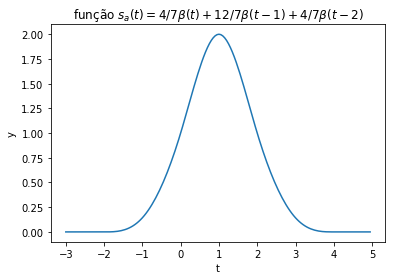

In [7]:
s = create_s([4/7,12/7,4/7])
t = np.arange(-3, 5, .05)
y = np.array(list(map(s, t)))
plt.plot(t,y)
plt.title(r'função $s_a(t) = 4/7 \beta(t) + 12/7 \beta(t-1) + 4/7 \beta(t-2)$')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### (questão 4) Calcule a magtriz $\mathrm{M}$ discutida na aula para o caso de 2 nós. $\mathrm{M}$ é uma matriz $2 \times 2$  com entradas

$$ m_{i,j} = \int_0^2 \beta''(t-(i-1))\beta''(t-(j-1)) dt$$

**(Solução)** 
$$
\mathrm{M} = \begin{bmatrix}
                        \int_0^2 \beta''(t)\beta''(t) dt & \int_0^2 \beta''(t))\beta''(t-1) dt \\
                        \int_0^2 \beta''(t-1)\beta''(t) dt & \int_0^2 \beta''(t-1)\beta''(t-1) dt
                     \end{bmatrix}
$$

$$
\mathrm{M} =\begin{bmatrix}
                        \int_0^1 \beta''(t)\beta''(t) dt + \int_1^2 \beta''(t)\beta''(t) dt & \int_0^1 \beta''(t)\beta''(t-1) dt + \int_1^2 \beta''(t))\beta''(t-1) dt \\
                        \int_0^1 \beta''(t-1)\beta''(t) dt + \int_1^2 \beta''(t-1)\beta''(t) dt & \int_0^1 \beta''(t-1)\beta''(t-1) dt + \int_1^2 \beta''(t-1)\beta''(t-1) dt
                     \end{bmatrix}
$$

$$
\mathrm{M} = \begin{bmatrix}
                        \int_0^1 \beta_3''(t)\beta_3''(t) dt + \int_1^2 \beta_4''(t)\beta_4''(t) dt & \int_0^1 \beta_3''(t)\beta_2''(t-1) dt + \int_1^2 \beta_4''(t))\beta_3''(t-1) dt \\
                        \int_0^1 \beta_3''(t)\beta_2''(t-1) dt + \int_1^2 \beta_4''(t))\beta_3''(t-1) dt & \int_{-1}^0 \beta_2''(t)\beta_2''(t) dt + \int_0^1 \beta_3''(t)\beta_3''(t) dt
                     \end{bmatrix}
$$

$$
\mathrm{M} = \begin{bmatrix}
                        \int_0^1 (\frac{9}{2}t -3)^2 dt + \int_1^2 (-\frac{3}{2}t+3)^2 dt & \int_0^1 (\frac{9}{2}t -3)(-\frac{9}{2}(t-1) -3) dt + \int_1^2 (\frac{9}{2}(t-1)t -3)(-\frac{3}{2}t+3) dt \\
                        \int_0^1 (\frac{9}{2}t -3)(-\frac{9}{2}(t-1) -3) dt + \int_1^2 (\frac{9}{2}(t-1)t -3)(-\frac{3}{2}t+3) dt& \int_{-1}^0 (-\frac{9}{2}t -3)^2 dt + \int_0^1 (\frac{9}{2}t -3)^2 dt
                     \end{bmatrix}
$$

$$
\mathrm{M} = \begin{bmatrix}
                        \int_0^1 \frac{81}{4}t^2 -27t +9 dt + \int_1^2 \frac{9}{4}t^2-9t+9 dt & \int_0^1 -\frac{81}{4}t^2+\frac{81}{4}t-\frac{9}{2} dt + \int_1^2 -\frac{27}{4}t^2+\frac{99}{4}t-\frac{45}{2} dt \\
                        \int_0^1 -\frac{81}{4}t^2+\frac{81}{4}t-\frac{9}{2} dt + \int_1^2 -\frac{27}{4}t^2+\frac{99}{4}t-\frac{45}{2} & \int_{-1}^0 \frac{81}{4}t^2 + 27t +9 dt + \int_0^1 \frac{81}{4}t^2 -27t +9 dt
                     \end{bmatrix}
$$

$$
\mathrm{M}= \begin{bmatrix}
                         (\frac{27}{4}t^3 -\frac{27}{2}t^2 +9t)|^1_0+ (\frac{3}{4}t^3-\frac{9}{2}t^2+9t)|^2_1 & (-\frac{27}{4}t^3+\frac{81}{8}t^2-\frac{9}{2}t)|_0^1 + (-\frac{9}{4}t^3+\frac{99}{8}t^2-\frac{45}{2}t)|_1^2 \\
                        (-\frac{27}{4}t^3+\frac{81}{8}t^2-\frac{9}{2}t)|_0^1 + (-\frac{9}{4}t^3+\frac{99}{8}t^2-\frac{45}{2}t)|_1^2   & (\frac{27}{4}t^3 + \frac{27}{2}t^2 +9t)|_{-1}^0 + (\frac{27}{4}t^3 -\frac{27}{2}t^2 +9t)|^1_0
                     \end{bmatrix}
$$

$$
\mathrm{M}= \begin{bmatrix}
                         (\frac{27}{4}-\frac{27}{2}+9) + [(\frac{3}{4}8-\frac{9}{2}4+18)-(\frac{3}{4}-\frac{9}{2}+9)] & (-\frac{27}{4}+\frac{81}{8}-\frac{9}{2}) + [(-\frac{9}{4}8+\frac{99}{8}4-45)-(-\frac{9}{4}+\frac{99}{8}-\frac{45}{2})]\\
                        (-\frac{27}{4}+\frac{81}{8}-\frac{9}{2}) + [(-\frac{9}{4}8+\frac{99}{8}4-45)-(-\frac{9}{4}+\frac{99}{8}-\frac{45}{2})] & [0-(-\frac{27}{4}+ \frac{27}{2} -9)] + (\frac{27}{4}-\frac{27}{2}+9)
                     \end{bmatrix}
$$

$$
\mathrm{M}= \begin{bmatrix}
                         \frac{9}{4} + [6-\frac{21}{4}] & -\frac{9}{8} + [(\frac{27}{2})-(\frac{63}{8})]\\
                        -\frac{9}{8} + [(\frac{27}{2})-(\frac{63}{8})] & \frac{9}{4} + \frac{9}{4}
                     \end{bmatrix}
$$

$$
\mathrm{M}= \begin{bmatrix}
                         3 & \frac{9}{2}\\
                        \frac{9}{2} &  \frac{9}{2}
                     \end{bmatrix}
$$

Pelo Wolfram a resposta é 
$$
\mathrm{M}= \begin{bmatrix}
                         3 & -\frac{9}{4}\\
                        -\frac{9}{4} &  \frac{9}{2}
                     \end{bmatrix}
$$

Pra calcular o wolfram é só fazer: 

`integrate (d²(BSplineBasis[3,0,x/4+0.5]*(3/2))/dx²)*(d²(BSplineBasis[3,0,x/4 +0.5]*(3/2))/dx²) dx from x=0 to 2` para o $m_{1,1}$

`integrate (d²(BSplineBasis[3,0,(x-1)/4+0.5]*(3/2))/dx²)*(d²(BSplineBasis[3,0,x/4 +0.5]*(3/2))/dx²) dx from x=0 to 2`  para 0 $m_{1,2}$ e $m_{1,2}$

`integrate (d²(BSplineBasis[3,0,(x-1)/4+0.5]*(3/2))/dx²)*(d²(BSplineBasis[3,0,(x-1)/4 +0.5]*(3/2))/dx²) dx from x=0 to 2` para $m_{2,2}$


### (Questão 5) escreva uma função que avalia a spline cúbica com nós 0,1,...,n no ponto t. Sua função deve fazer um número de operações limitado e independente de n (No máximo 20 multiplicações e somas, digamos)

`float spline_cubica (float* a, int n, float t)`

**(Solução)** para um dado ponto $t_0$, temos que no máximo 4 funções $\beta$ que contribuem com parcelas não nula para o seu valor, como mostrado na figura abaixo: onde contribuem para $t_0$ as funções $\beta$ centradas em: $n_0 -2$, $n_0 -1$, $n_0$ e $n_0+1$. Assim basta calcular $$s(t_0) = \sum_{k=n_0-2}^{n_0+1}a_k \beta(t_0-k)$$ . Assim o número de de operações é independente de $n$.

`float spline_cubica (float* a, int n, float t)`

`n_0 = roof(t);`

`int s = 0;`

`if(n_0 = t){ #caso t esteja em cima de um numero natural` 

` for (k=t-1;k<=t+1;k++){`

`   s += a[k]*beta(t-k);`

`else #caso geral t entre 2 numeros naturais`

` for (k=t-2;k<=t+1;k++){`

`   s += a[k]*beta(t-k);`

`# precisa tratar pra quando k< 0 e k > n, mas é isso em suma`

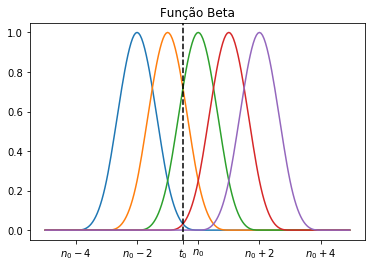

In [30]:
#beta centrada em 0
t = np.arange(-3,7,.05)
y_1 = np.array(list(map(beta, t)))
#beta centrada em 1
s = create_s([0,1])
y_2 = np.array(list(map(s, t)))
#beta cetrada em 2
s = create_s([0,0,1])
y_3 = np.array(list(map(s, t)))
#beta centrada 3
s = create_s([0,0,0,1])
y_4 = np.array(list(map(s, t)))
#beta centrada 4
s = create_s([0,0,0,0,1])
y_5 = np.array(list(map(s, t)))
#v_line

plt.plot(t,y_1)
plt.plot(t,y_2)
plt.plot(t,y_3)
plt.plot(t,y_4)
plt.plot(t,y_5)
plt.axvline(1.5, color='k', linestyle='dashed')
plt.title('Função Beta')
plt.xticks([-2, 0, 1.5, 2, 4, 6],[r'$n_0-4$', r'$n_0-2$', r'$t_0$', r'$n_0$', r'$n_0+2$', r'$n_0+4$'])



plt.show()